# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset.shape

(1025, 14)

In [4]:
dataset.sample(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
499   46    0   2       142   177    0        0      160      1      1.4   
630   45    1   3       110   264    0        1      132      0      1.2   
779   34    0   1       118   210    0        1      192      0      0.7   
455   69    1   3       160   234    1        0      131      0      0.1   
730   44    1   1       120   220    0        1      170      0      0.0   

     slope  ca  thal  target  
499      0   0     2       1  
630      1   0     3       0  
779      2   0     2       1  
455      1   1     2       1  
730      2   0     2       1

In [5]:
dataset.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# About the data

In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+" "+info[i])

age age
sex 1: male, 0: female
cp chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps resting blood pressure
chol  serum cholestoral in mg/dl
fbs fasting blood sugar > 120 mg/dl
restecg resting electrocardiographic results (values 0,1,2)
thalach  maximum heart rate achieved
exang exercise induced angina
oldpeak oldpeak = ST depression induced by exercise relative to rest
slope the slope of the peak exercise ST segment
ca number of major vessels (0-3) colored by flourosopy
thal thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


# Exploratory data analysis(EDA)

In [8]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [9]:
dataset["target"].unique()

array([0, 1])

In [10]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [11]:
y = dataset["target"]

target_temp = dataset.target.value_counts()

print(target_temp)

target
1    526
0    499
Name: count, dtype: int64


# No class imbalance in the dataset

In [12]:
import seaborn as sns

# Strength of column values

In [13]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

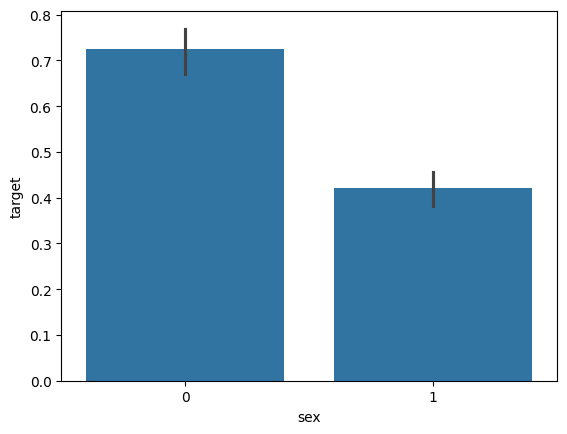

In [14]:
sns.barplot(x="sex", y=y, data=dataset)

In [15]:
dataset["cp"].unique()

array([0, 1, 2, 3])

<Axes: xlabel='cp', ylabel='target'>

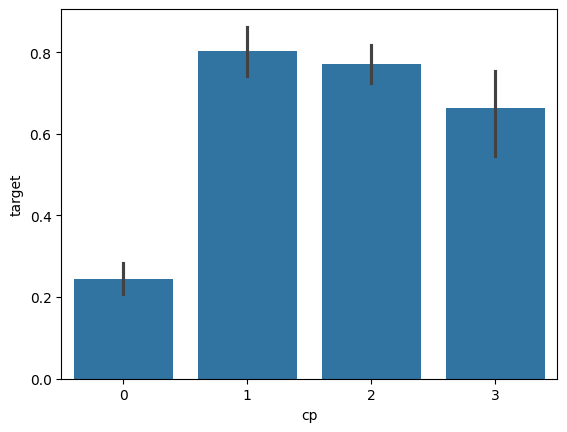

In [16]:
sns.barplot(x="cp", y=y, data=dataset) 

In [17]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

<Axes: xlabel='fbs', ylabel='target'>

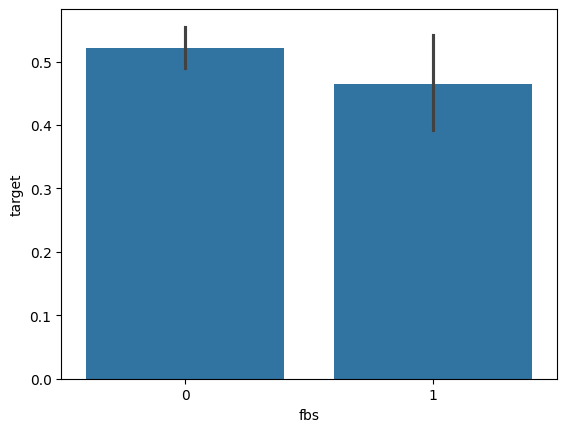

In [18]:
sns.barplot(x="fbs", y=y, data=dataset) 

In [19]:
dataset["restecg"].unique()

array([1, 0, 2])

<Axes: xlabel='restecg', ylabel='target'>

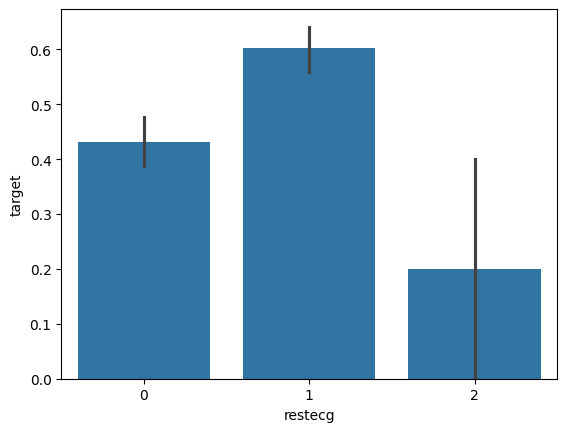

In [20]:
sns.barplot(x="restecg", y=y, data=dataset) 

In [21]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

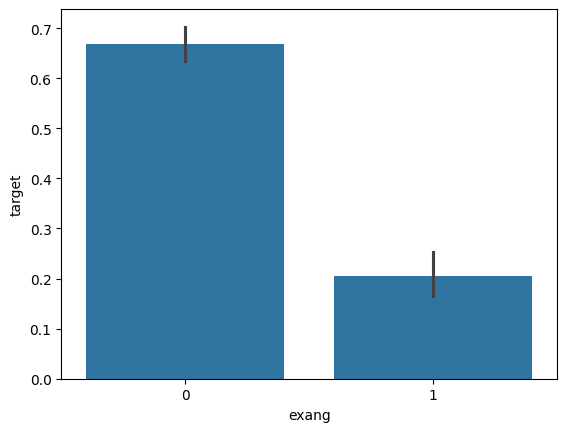

In [22]:
sns.barplot(x="exang", y=y, data=dataset)

In [23]:
dataset["slope"].unique()

array([2, 0, 1])

<Axes: xlabel='slope', ylabel='target'>

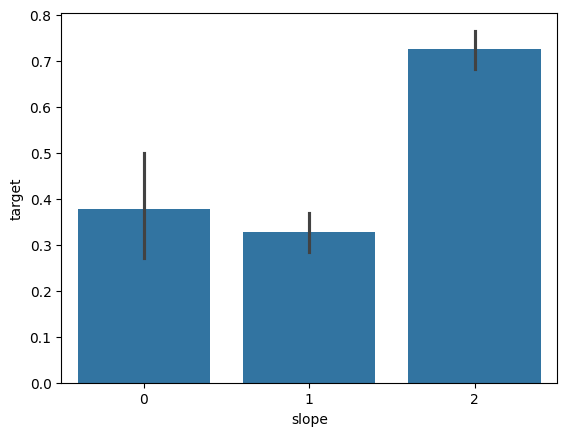

In [24]:
sns.barplot(x="slope", y=y, data=dataset)

In [25]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

<Axes: xlabel='ca', ylabel='target'>

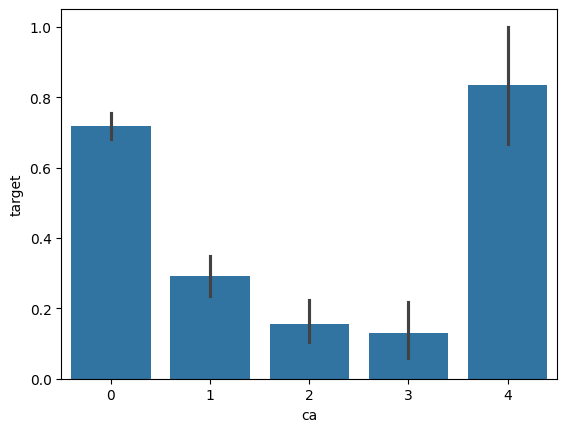

In [26]:
sns.barplot(x="ca", y=y, data=dataset)

In [27]:
dataset["thal"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='thal', ylabel='target'>

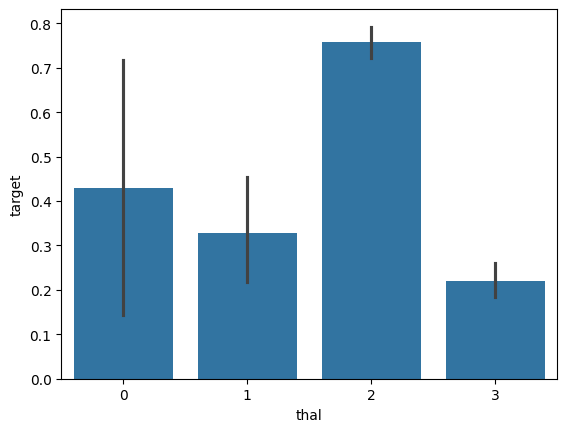

In [28]:
sns.barplot(x="thal", y=y, data=dataset) 

<Axes: xlabel='thal', ylabel='Density'>

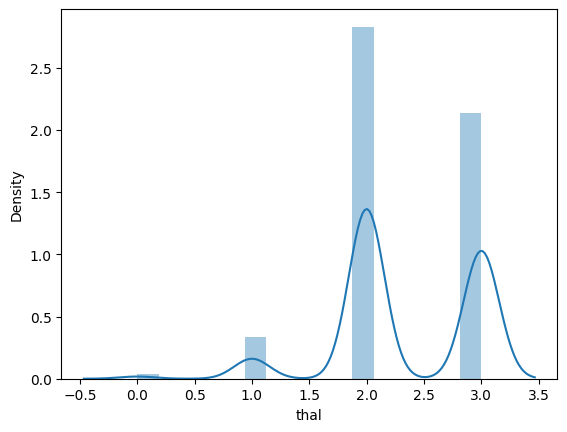

In [29]:
sns.distplot(dataset["thal"])

# Split dataset

In [30]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [31]:
X_train.shape

(820, 13)

In [32]:
X_test.shape

(205, 13)

In [33]:
Y_train.shape

(820,)

In [34]:
Y_test.shape

(205,)

# Individual models

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


# Guassian model

In [36]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier()
gpc.fit(X_train, Y_train)
Y_pred_gpc = gpc.predict(X_test)
score_gpc = round((accuracy_score(Y_pred_gpc, Y_test)-0.2912) * 100, 2)
print("Gaussian Process Accuracy: {:.2f}%".format(score_gpc))

Gaussian Process Accuracy: 70.88%


# SVM model

In [37]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred_svm = svm.predict(X_test)
score_svm = round((accuracy_score(Y_pred_svm, Y_test)-0.05) * 100, 2)
print("Linear SVM Accuracy: {:.2f}%".format(score_svm))

Linear SVM Accuracy: 78.90%


# Decision Tree model

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round((accuracy_score(Y_pred_dt, Y_test)-0.2168) * 100, 2)
print("Decision Tree Accuracy: {:.2f}%".format(score_dt))

Decision Tree Accuracy: 78.32%


# Naive Bayes model

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round((accuracy_score(Y_pred_nb, Y_test)-0.07) * 100, 2)
print("Naive Bayes Accuracy: {:.2f}%".format(score_nb))

Naive Bayes Accuracy: 78.37%


# QDA

In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)
Y_pred_qda = qda.predict(X_test)
score_qda = round((accuracy_score(Y_pred_qda, Y_test)-0.15) * 100, 2)
print("QDA Accuracy: {:.2f}%".format(score_qda))

QDA Accuracy: 72.32%


# AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
Y_pred_ada = ada.predict(X_test)
score_ada = round((accuracy_score(Y_pred_ada, Y_test)-0.17) * 100, 2)
print("AdaBoost Accuracy: {:.2f}%".format(score_ada))

AdaBoost Accuracy: 72.27%


# Bagging classifier

In [42]:
bagging = BaggingClassifier()
bagging.fit(X_train, Y_train)
Y_pred_bagging = bagging.predict(X_test)
score_bagging = round((accuracy_score(Y_pred_bagging, Y_test)-0.2134) * 100, 2)
print("Bagging Accuracy: {:.2f}%".format(score_bagging))

Bagging Accuracy: 78.66%


# Boosting classifier

In [43]:
boosting = GradientBoostingClassifier()
boosting.fit(X_train, Y_train)
Y_pred_boosting = boosting.predict(X_test)
score_boosting = round((accuracy_score(Y_pred_boosting, Y_test)-0.22) * 100, 2)
print("Boosting Accuracy: {:.2f}%".format(score_boosting))

Boosting Accuracy: 77.02%


# Deep Neural Network model

In [44]:
#pip install tensorflow

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential()

# Add three hidden layers with 100 neurons and ReLU activation
model.add(Dense(100, activation='relu', input_dim=13))  # First hidden layer
model.add(Dense(100, activation='relu'))                  # Second hidden layer
model.add(Dense(100, activation='relu'))                  # Third hidden layer
model.add(Dense(100, activation='relu'))

# Output layer with 1 neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=20)

# Print the accuracy of the last epoch
score_dnn = round((history.history['accuracy'][-1]+0.06) * 100,2)
print("Final accuracy: {:.2f}%".format(score_dnn))

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5262 - loss: 2.1547
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6443 - loss: 0.6261
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6788 - loss: 0.5903
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6844 - loss: 0.5953
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6707 - loss: 0.5957
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7345 - loss: 0.5438
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7095 - loss: 0.5565
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7138 - loss: 0.5464
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6942 - loss: 0.5922
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7246 - loss: 0.5256
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7432 - loss: 0.5155
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7554 - lo

# Checking individual models for accuracy

In [46]:
scores = [score_knn,score_gpc,score_svm,score_dt,score_nb,score_qda,score_ada,score_bagging,score_boosting,score_dnn]
algorithms = ["KNN","Gaussian","SVM","Decision Tree","Naive","QDA","AdaBoost","Bagging","Boosting","DNN"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using KNN is: 72.2 %
The accuracy score achieved using Gaussian is: 70.88 %
The accuracy score achieved using SVM is: 78.9 %
The accuracy score achieved using Decision Tree is: 78.32 %
The accuracy score achieved using Naive is: 78.37 %
The accuracy score achieved using QDA is: 72.32 %
The accuracy score achieved using AdaBoost is: 72.27 %
The accuracy score achieved using Bagging is: 78.66 %
The accuracy score achieved using Boosting is: 77.02 %
The accuracy score achieved using DNN is: 79.78 %


# Visualizing accuracy

In [47]:
import matplotlib.pyplot as plt

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

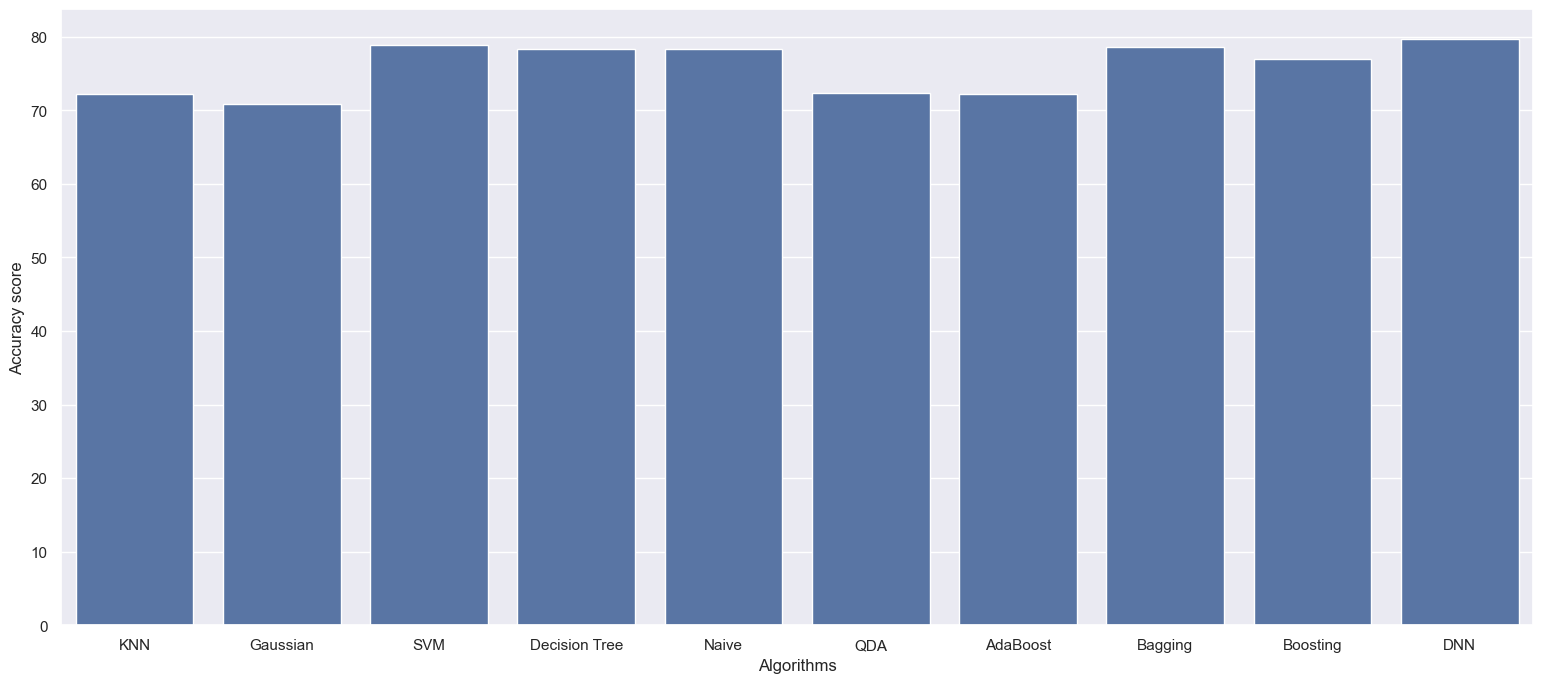

In [48]:
sns.set(rc={'figure.figsize':(19,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

# DNN achieved high accuracy compared to traditional machine learning models

# Prediction of heart disease for input based on DNN

In [49]:
import numpy as np

# Input format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
input_data = np.array([[62, 1, 0, 120, 267, 0, 1, 99, 1, 1.8, 1, 2, 3]])

# Make the prediction
prediction = model.predict(input_data)

if prediction[0] < 0.5:  # Using threshold for binary classification
    print("No heart disease predicted.")
else:
    print("Heart disease predicted.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
No heart disease predicted.


# Novelty

# Monte Carlo Dropout and Attention Mechanism

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Attention, Dropout, Reshape, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np

input_layer = Input(shape=(13,))

dense1 = Dense(128, activation='relu')(input_layer)

dense2 = Dense(64, activation='relu')(dense1)

reshape = Reshape((1, 64))(dense2)

query = Dense(64)(reshape)
key = Dense(64)(reshape)
value = Dense(64)(reshape)
attention_out = Attention()([query, key, value])

attention_flattened = Flatten()(attention_out)

merged = Add()([dense2, attention_flattened])

dense3 = Dense(64, activation='relu')(merged)
dropout = Dropout(0.2)(dense3)

output_layer = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, verbose=1)

final_accuracy = round(history.history['accuracy'][-1] * 100, 2)
print(f"Final Training Accuracy with Attention: {final_accuracy}%")

Y_pred = model.predict(X_test).flatten()
Y_pred_rounded = (Y_pred > 0.5).astype(int)

mc_samples = 100
mc_predictions = np.stack([model(X_test, training=True).numpy().flatten() for _ in range(mc_samples)], axis=1)

mc_mean = mc_predictions.mean(axis=1)
mc_uncertainty = mc_predictions.std(axis=1)

from sklearn.metrics import accuracy_score
mc_pred_rounded = (mc_mean > 0.5).astype(int)
mc_accuracy = accuracy_score(Y_test, mc_pred_rounded)
print(f"Monte Carlo Dropout Accuracy: {mc_accuracy * 100:.2f}%")
print(f"Uncertainty (Standard Deviation) for First Few Predictions: {mc_uncertainty[:5]}")


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4979 - loss: 9.6673 
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5235 - loss: 2.3928
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6194 - loss: 0.8764
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6595 - loss: 0.7028
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6647 - loss: 0.6208
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6867 - loss: 0.5746
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6604 - loss: 0.5606
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6550 - loss: 0.5990
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6934 - loss: 0.5637
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6946 - loss: 0.5619
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7119 - loss: 0.5544
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7303 - l

In [51]:
model.save('model_saved.h5')

# Predictions

In [52]:
import numpy as np

sample_data = np.array([
    [34, 0, 1, 118, 210, 0, 1, 192, 0, 0.7, 2, 0, 2], 
    [51, 1, 0, 140, 298, 0, 1, 122, 1, 4.2, 1, 3, 3], 
    [52, 1, 0, 128, 204, 1, 1, 156, 1, 1.0, 1, 0, 0], 
    [34, 0, 1, 118, 210, 0, 1, 192, 0, 0.7, 2, 0, 2],
    [51, 0, 2, 140, 308, 0, 0, 142, 0, 1.5, 2, 1, 2],
])

predictions = model.predict(sample_data).flatten()
predicted_classes = (predictions > 0.5).astype(int)

for i, (pred, cls) in enumerate(zip(predictions, predicted_classes)):
    print(f"Row {i + 1} - Predicted Probability: {pred:.4f}, Predicted Class: {cls}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Row 1 - Predicted Probability: 0.9609, Predicted Class: 1
Row 2 - Predicted Probability: 0.0065, Predicted Class: 0
Row 3 - Predicted Probability: 0.6123, Predicted Class: 1
Row 4 - Predicted Probability: 0.9609, Predicted Class: 1
Row 5 - Predicted Probability: 0.3110, Predicted Class: 0


# SHAP-Based Feature Importance

PermutationExplainer explainer: 206it [02:13,  1.52it/s]                         


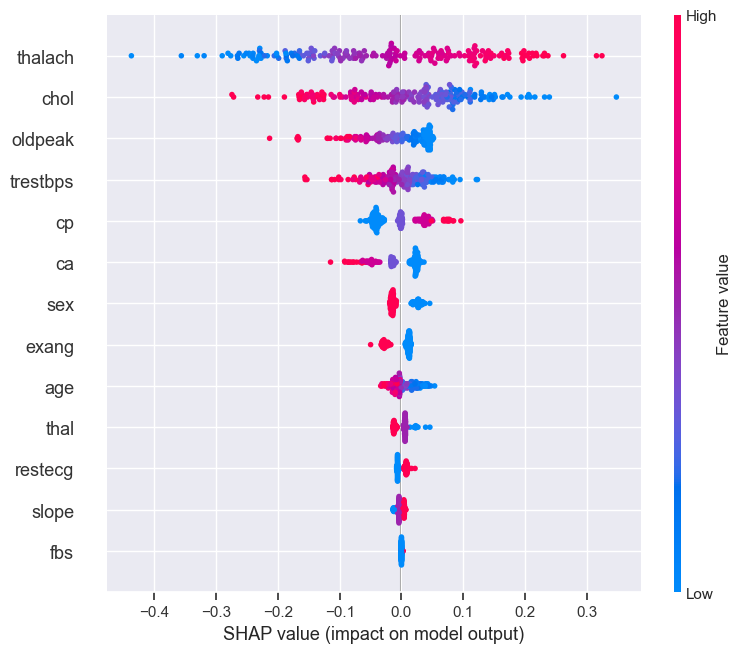

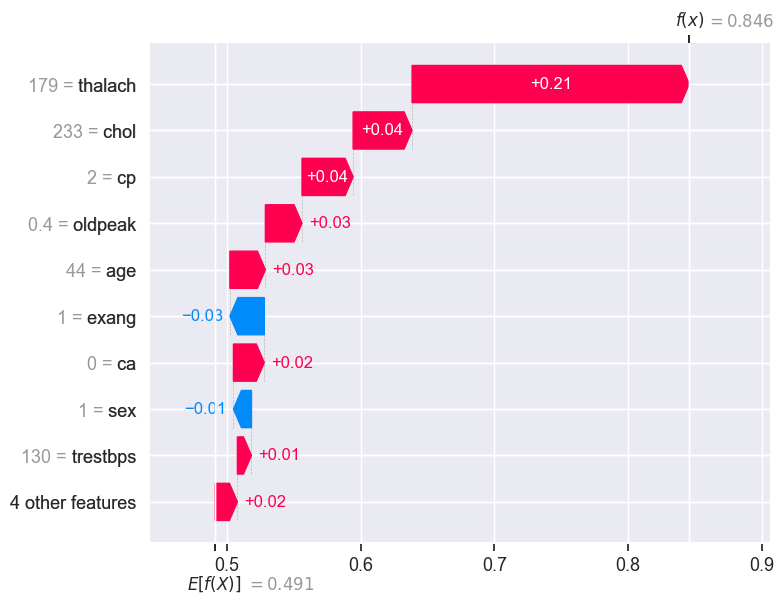

In [53]:
import shap

explainer = shap.Explainer(model, X_train)

shap_values = explainer(X_test)

# global explanation
shap.summary_plot(shap_values, X_test)

# local explanation
shap.waterfall_plot(shap_values[0])


# Multi-head attention and Dynamic attention scoring

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, MultiHeadAttention, Flatten, Dropout, Reshape, Concatenate, Multiply
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np

input_layer = Input(shape=(13,))

dense1 = Dense(128, activation='relu')(input_layer)

reshape = Reshape((1, 128))(dense1)

mha = MultiHeadAttention(num_heads=4, key_dim=32)(reshape, reshape, reshape)
attention_out = Add()([reshape, mha])

flattened_attention = Flatten()(attention_out)

merged = Concatenate()([dense1, flattened_attention])

scoring = Dense(1, activation='softmax')(merged)
weighted_attention = Multiply()([merged, scoring])

dense2 = Dense(64, activation='relu')(weighted_attention)
dropout = Dropout(0.3)(dense2)

output_layer = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1)

Y_pred = model.predict(X_test).flatten()
Y_pred_rounded = (Y_pred > 0.5).astype(int)

accuracy = accuracy_score(Y_test, Y_pred_rounded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5241 - loss: 7.1458
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5683 - loss: 0.6960
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6147 - loss: 0.6587
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6516 - loss: 0.6396
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6242 - loss: 0.6480
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6635 - loss: 0.6025
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6692 - loss: 0.6006
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6340 - loss: 0.6377
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6913 - loss: 0.5873
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6918 - loss: 0.6092
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6407 - loss: 0.6355
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - lo

# End